# Problema

Use aritmética de 4 dı́gitos (redondeando) para simular el problema del cálculo computacional de $\pi-\tfrac{22}{7}$. 
Luego calcule el error absoluto y el error relativo de la representción de $\pi$ y de $\tfrac{22}{7}$, y el error relativo de la diferencia.

# Problema

Interprete el resultado de los siguientes programas en virtud de la representación
de punto flotante de los números reales. Pruebe con distintos tipos de punto flotante

    https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/

 #### Unicode
 https://docs.julialang.org/en/v1/manual/unicode-input/

In [11]:
# programa "test igualdad"

tipo = Float16
#tipo = Float32
#tipo = Float64

if (tipo(19.08) + tipo(2.01) == tipo(21.09))
    println("19.08 + 2.01 = 21.09")
else 
    println("19.08 + 2.01 ≠ 21.09")
end
# Da distinto solo para 64 bits

19.08 + 2.01 = 21.09


In [19]:
# programa "test igualdad 2"

tipo = Float16
#tipo = Float32
#tipo = Float64

a = tipo(2.05)
if (a*tipo(100) == tipo(205))  
    println("2.05*100 = 205")
else 
    println("2.05*100 ≠ 205")
end
# Solo da igual con 32 bits, no entiendo bien porque 

2.05*100 ≠ 205


Piense el mensaje de este ejercicio, el cual debe tener presente en toda la materia.

# Problema

Escriba un programa que calcule $\epsilon_m$ de su máquina alrededor del número 1, en simple y doble precisión. Compárelo con `eps(1.)` que es el que brinda Julia. Repita para valores de $\epsilon_m$ alrededor del número cero.

In [3]:
# De esta forma sumo valores hasta que si sumo otro serian indistinguibles, entonces freno antes y veo n
n = Float32(1.)
while Float32(1.) + n > Float32(1.)
    n *= Float32(0.1)
end
println(n)
println(eps(Float32(1.0)))

1.0000002e-8
1.1920929e-7


In [4]:
# Para 64 bits
n = Float64(1.)
while Float64(1.) + n > Float64(1.)
    n *= Float64(0.1)
end
println(n)
println(eps(Float64(1.0)))

1.000000000000001e-16
2.220446049250313e-16


In [7]:
# y para el cero
n = 1
f = 1 
while f > 0
    n = n + 1
    f = 10.0 ^ (-n)
end
println(10.0^(-n+1))
println(eps(0.))

1.0e-323
5.0e-324


In [1]:
# El que hizo el profe
tipo = Float32

value = tipo(π*π)
epsilon = tipo(1.0)
_0p5 = tipo(0.5)

while ((value + _0p5 * epsilon) ≠ value)
    epsilon = _0p5 * epsilon
end

epsilon

9.536743f-7

# Problema

De ejemplos para mostrar que la matemática de punto flotante

1. no es cerrada respecto a la suma ni a la multiplicación,

2. no es asociativa respecto a la suma ni a la multiplicación,

3. la multiplicación no es  distributiva respecto a la suma.

Haga el programa correspondiente.

In [17]:
#1 Suma
xas = eps(1.0)/2
println(xas>0)
println(xas==0)
a = xas + 1.0 

true
false


1.0

In [22]:
# Esto no demuestra que no sea cerrada a la multiplicacion, y no se como hacerlo
println(xas>0)
println(xas==0)
println((1+xas)*2)
println(1.0*2.0)

true
false
2.0
2.0


In [35]:
#2 Suma
10e-7 + (xas + 1.0) == (0.00001 + xas) + 1.0

false

In [42]:
# 2 multiplicacion ??? 
(xas*xas)*xas == xas*(xas*xas)

true

In [34]:
#3
(xas+1) * 10 == xas*10 + 1*10

false

# Problema

Implementar un programa para evaluar la suma (en precisión
simple)

$$
\sum_{n=1}^{10^7} \frac{1}{n}
$$

primero, en el orden usual, y luego, en el orden opuesto. Explique las diferencias
obtenidas  e indique cuál es más preciso y su justificación.


In [50]:
#Primero realizamos la suma en 64 bits y vemos que los valores son cercanos
tipo = Float64
s= tipo(0)
for N ∈ tipo(1):tipo(10^7)
    s = s + tipo(1)/N
end

tipo = Float64
srev= tipo(0)
for N ∈ tipo(10^7):-1:tipo(1)
    srev = srev + tipo(1)/N
end
println(srev)
println(s)

16.695311365859965
16.695311365857272


In [44]:
tipo = Float32
s= tipo(0)
for N ∈ tipo(1):tipo(10^7)
    s = s + tipo(1)/N
end
s
# Si comparamos con la suma en 64 bits vemos que es un resultado lejano

15.403683f0

In [51]:
tipo = Float32
s= tipo(0)
for N ∈ tipo(10^7):-1:tipo(1)
    s = s + tipo(1)/N
end
s
# Si comparamos con la suma en 64 bits vemos que es un resultado

16.686031f0

Podemos ver que es mas preciso el resultado para la sumatoria realizado en reversa, al sumar numeros mas pequeños primero, los epsilon de esos numeros van siendo cada vez mayores y por ende se suman todos los valores.
Para el caso en el que se suma desde 1 hasta 1/10^7 vemos que al principio tenemos un valor mayor y dentro de su epsilon luego caen valores y no son sumados ya que la maquina no detecta la diferencia, debido a la variacion en los intervalos de los numeros flotantes.

In [9]:
# Programa Profes para guardar los errores parciales
err_2 = Vector{Float64}()
err_3 = Vector{Float64}()

suma_2 = 0.
suma_3 = 0.
for n = 1:10^3
    tmp = 0.0
    for m = 1:10^3
        suma_2 += 0.1
        tmp += 0.1
    end    
    suma_3 += tmp
    suma_1 = n*100.
    push!(err_2,abs(suma_1-suma_2))
    push!(err_3,abs(suma_1-suma_3))
end

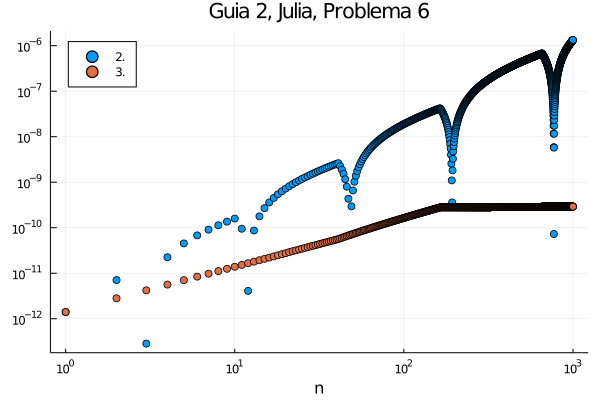

In [10]:
using Plots

scatter(err_2,
    xaxis=:log,
    yaxis=:log,
    xlab="n",
    ylab="",
    label="2.",
    legend=:topleft,
    title="Guia 2, Julia, Problema 6")
scatter!(1:1000,err_3,label="3.")

# Problema

La fórmula cuadrática nos dice que las raíces de $ax^2 + bx + c = 0$ son
$$
x_1 = \frac{-b + \sqrt{b^2 -4ac}}{2a}, \qquad \qquad x_2 =  \frac{-b - \sqrt{b^2 -4ac}}{2a} .
$$
Si $b^2\gg 4ac$, entonces, cuando $b>0$, el cálculo de $x_1$ involucra en el numerador la sustracción de dos números casi iguales, mientras que si $b<0$, esta situación ocurre para el cálculo de $x_2$. *Racionalizando el numerador* se obtienen las siguientes fórmulas alternativas que no sufren este problema:
$$
x_1 = \frac{-2c}{b + \sqrt{b^2 -4ac}}, \qquad \qquad x_2 =  \frac{2c}{-b + \sqrt{b^2 -4ac}} ,
$$
siendo la primera adecuada cuando $b>0$, y la segunda cuando $b<0$.
Escriba un programa en precisión simple que utilice la fórmula usual y la *racionalizada* para calcular las raíces de
$$
x^2 + 6210 x + 1 = 0.
$$
Interprete los resultados.


In [2]:
a = 1.0
b = 6210.0
c = 1.0
#fórmula tradicional
x1 = (-b + sqrt(b^2.0-4.0*a*c))/2.0*a
x2 = (-b - sqrt(b^2.0-4.0*a*c))/2.0*a
#fórmula racionalizada
x1r = (-2.0*c)/(b+sqrt(b^2.0-4.0*a*c))
x2r = (2.0*c)/(-b+sqrt(b^2.0-4.0*a*c))
println(x1)
println(x2)
println(x1r)
println(x2r)
# Rehacer elijiendo la precisión de todos los numeros incluidos 

-0.00016103059988381574
-6209.9998389694
-0.0001610305999888654
-6209.999843020545


# Problemas complementarios

## Problema

Considere el siguiente programa y explique por que los valores obtenidos no son iguales:

In [67]:
mi_tipo = Float32

mi_0 = mi_tipo(0.0)
mi_1 = mi_tipo(1.0)
δ    = mi_tipo(1.0e-8)

sum0 = mi_0
sum1 = mi_1

for i = 1:100000
   sum0 = sum0 + δ
   sum1 = sum1 + δ
end

sum0 = sum0 + mi_1

println("sum0=$sum0 sum1=$sum1")

sum0=1.0010009 sum1=1.0


## Problema

Supóngase que $x$ e $y$ son números positivos correctamente redondeados
a $t$ dígitos. Mostrar que la magnitud del error relativo de redondeo de
$z=x-y$ está acotada por
$$
\left| \frac{\Delta z}{z} \right| \leq \frac{|x| + |y|}{|x-y|}\ {\bf u} + {\bf u},
$$
donde ${\bf u}$ es la unidad de redondeo,  ${\bf u}=\frac12 \epsilon_M$




## Problema

*Problema matemáticamente inestable.* Considere la sucesión

\begin{equation}
x_n\,=\,\frac{13}{3} \,x_{n-1} - \frac{4}{3}\, x_{n-2} \, \label{eq1}\tag{1}
\end{equation}

1. Demuestre que, eligiendo $x_0=1\;,x_1=1/3$ tenemos que  $x_n=1/3^n\;\forall n\geq 0$ (sugerencia: use inducción).

2. Haga un código que calcule  $x_n$ y su error relativo hasta $n=15$ y discuta el resultado comparando reales de 4 y 8 bytes.

3. Defina $y_n=1/x_n$ y encuentre la relación de recurrencia para  $y_n$. Imponga la condición inicial $y_0=1, \;y_1=3$. Calcule ahora $x_n=1/y_n$ y compare con lo obtenido en el punto anterior. Es este algoritmo estable? discuta.

4. Verifique que la solución general de la ecuación $(\ref{eq1})$ con $x_0,\,x_1$ arbitrarios es $x_n\,=\,\frac{A}{3^n} \,+\,B\,4^n\,$. Note que los valores iniciales elegidos en 2. y 3. corresponden al caso particular $A=1$ y $B=0$. Discuta en base a esto los resultados numricos obtenidos.

In [80]:
# Por inducción mostramos los primeros 3 casos (no hace falta pero para que quede mas claro)
x0 = 1 # entonces se cumple (1/3)^0 = 1
x1 = 1//3 # entonces se cumple (1/3)^1 = 1/3
x2 = (13//3) * x1 - (4//3) * x0
x2 == (1//3)^2

true

In [ ]:
# Ahora podemos revisar el paso n-esimo, o el paso inductivo, suponiendo que funciona para xn, es decir:
xn = (1/3)^n


## Problema

Considere las siguientes integrales
$$
y_n = \int_0^1 \frac{x^n}{x+10}dx
$$
para $n=1,2,\dots ,30$. 
Muestre que
$$
y_n = \frac{1}{n} - 10 y_{n-1} \ ,
$$
y que  $y_0 = \ln(11) - \ln(10)$.
Note que empleando esta fórmula de recursión, se obtienen los
resultados exactos de las integrales.

1. Escriba un programa en precisión simple que a partir de $y_0$, calcule recursivamente $y_i$ para $i=2,\cdots ,30$. 
Explique los resultados obtenidos (note que $0 < y_n < 1$).

2. Derive una fórmula para evaluar $y_{n-1}$ dado $y_n$. 
Escriba un programa que utilice esta recursión para calcular $y_n$, aproximando $y_{n+k}$ por 0. Explique por qué este algoritmo es estable. 
Encuentre el valor de $k$, para que el programa calcule $y_{7}$ con un error absoluto menor a $10^{-6}$ (note que $y_7 \approx 0.0114806$). 

3. Modifique el programa para que tome como entrada $n$, y el error absoluto deseado, $\epsilon$, y luego estimando el error absoluto en el calculo de $y_n$ como $Err = |\hat{y}_n(y_{n+k}=0) - \hat{y}_n(y_{n+k-1}=0)|$, determine $y_n$ con un error absoluto (aproximado) menor que $\epsilon$. 
Aquí, $\hat{y}_n(y_{n+k}=0)$ es el valor de $y_n$ obtenido partiendo de $y_{n+k}=0$.